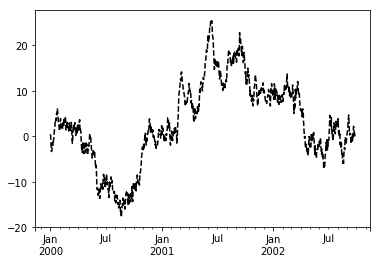

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

plt.figure(); ts.plot(style='k--', label='Series');

### Controlling the Legend
You may set the `legend` argument to `False` to hide the legend, which is shown by default.

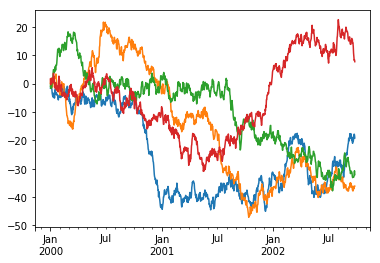

In [7]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()

df.plot(legend=False)

### Scales
You may pass `logy` to get a log-scale Y axis.

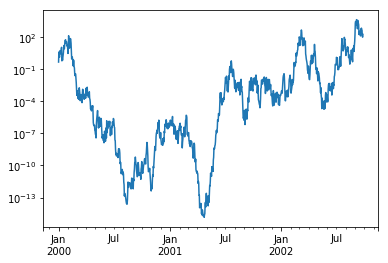

In [8]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = np.exp(ts.cumsum())

ts.plot(logy=True)

### Plotting on a Secondary Y-axis
To plot data on a secondary y-axis, use the secondary_y keyword:

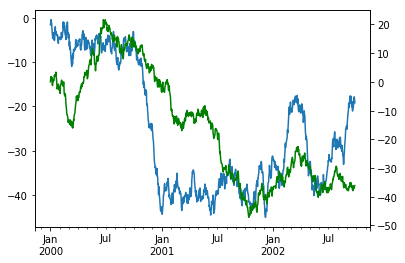

In [9]:
df.A.plot()

df.B.plot(secondary_y = True, style = 'g')

Note that the columns plotted on the secondary y-axis is automatically marked with “(right)” in the legend. To turn off the automatic marking, use the mark_right=False keyword:

Text(0,0.5,'AB scale')

<Figure size 432x288 with 0 Axes>

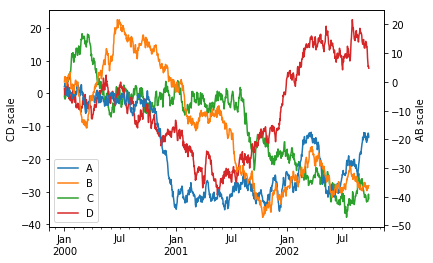

In [10]:
plt.figure()

ax = df.plot(secondary_y=['A', 'B'], mark_right=False)

ax.set_ylabel('CD scale')

ax.right_ax.set_ylabel('AB scale')

### Suppressing Tick Resolution Adjustment

Using the `x_compat` parameter, you can suppress this behavior:

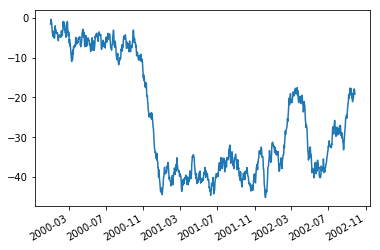

In [11]:
plt.figure()

df.A.plot(x_compat=True)

If you have more than one plot that needs to be suppressed, the `use` method in `pandas.plotting.plot_params` can be used in a with statement:

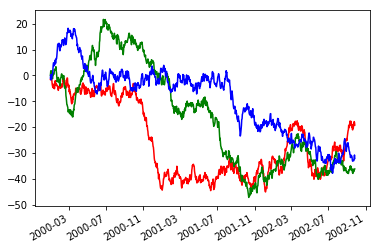

In [12]:
plt.figure()

with pd.plotting.plot_params.use('x_compat', True):
    df.A.plot(color='r')
    df.B.plot(color='g')
    df.C.plot(color='b')

###  Plotting With Error Bars

Here is an example of one way to easily plot group means with standard deviations from the raw data.

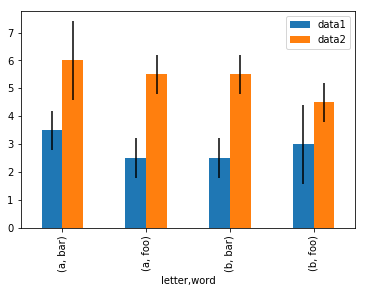

In [13]:
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], names=['letter', 'word'])

df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix3)

gp3 = df3.groupby(level=('letter', 'word'))

means = gp3.mean()

errors = gp3.std()

fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax)

### Plotting Tables
Plotting with matplotlib table is now supported in DataFrame.plot() and Series.plot() with a table keyword. The table keyword can accept bool, DataFrame or Series. The simple way to draw a table is to specify table=True. Data will be transposed to meet matplotlib’s default layout.

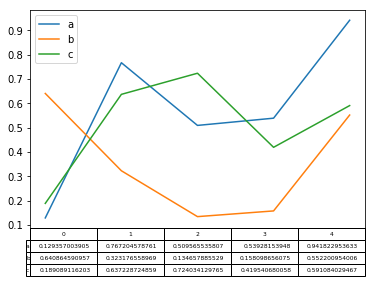

In [14]:
fig, ax = plt.subplots(1, 1)

df = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])

ax.get_xaxis().set_visible(False)   # Hide Ticks

df.plot(table=True, ax=ax)